# Answer 2.2.1

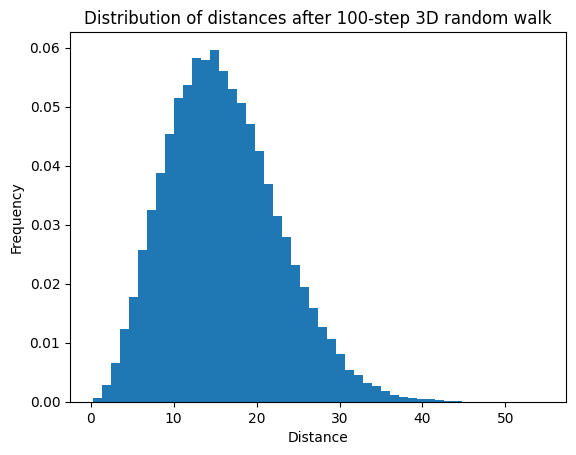

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of steps
n_trials = 100000  # Number of Monte Carlo trials

# Simulating 3D random walk
def random_3d_walk(N):
    """Args: N = Number of steps
       Returns: distance = Euclidean distance
    """

    # Generating a single sequence of N steps in 3 dimensions sampled from N(0, 1)
    steps = np.random.normal(0, 1, (N, 3))

    # Since the directions are independent with each other, we sum the all the columns to get a single [x,y,z] array.
    S = np.sum(steps, axis=0)

    # Calculating the magnitude of the S (Euclidean distance)
    distance = np.linalg.norm(S)
    return distance

# Example simulation of n_trials random walk
distances = [random_3d_walk(N) for _ in range(n_trials)]
plt.hist(distances, bins=50, density=True)
plt.title(f"Distribution of distances after {N}-step 3D random walk")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

# Answer 2.2.2

In [16]:
# Monte Carlo method to compute the probability P(S>10).

def monte_carlo_probability(N, L, trials):
    distances = [random_3d_walk(N) for _ in range(n_trials)]
    probability = sum(1 for distance in distances if distance > 10) / n_trials
    return probability

# Parameters
L = 10
trials = 100000

# Estimate the probability
probability = monte_carlo_probability(N, L, trials)
probability


0.79939

# Answer 2.2.3

In [26]:
def importance_sampling_probability(N, L, trials, scaling_factor):
    count = 0
    weights = []
    for _ in range(trials):
        # Simulate steps with increased variance to make larger distances more likely
        steps = np.random.normal(0, scaling_factor, (N, 3))
        position = np.sum(steps, axis=0)
        distance = np.linalg.norm(position)
        if distance > L:
            # Calculate the weight for importance sampling
            weight = np.exp(-(np.sum(position**2) / (2 * scaling_factor**2 - 2)))
            weights.append(weight)
            count += 1
    # Compute the weighted probability
    weighted_prob = np.sum(weights) / trials
    return weighted_prob

# Parameters
N = 100
L = 55
trials = 100000
scaling_factor = 2  # Adjust this as needed; typically chosen based on experimentation

# Estimate the probability using importance sampling
importance_prob = importance_sampling_probability(N, L, trials, scaling_factor)

print("Estimated probability P(S_N > 55) = {:5E}".format(importance_prob))


Estimated probability P(S_N > 55) = 4.176665E-223


# Answer 2.2.4

In [20]:
N = 100
trials = 100000

def monte_carlo_error(N, L, trials, method="monte_carlo", scaling_factor=1):
    probabilities = []
    for _ in range(100):  # 100 repetitions for error estimation
        if method == "monte_carlo":
            probabilities.append(monte_carlo_probability(N, 10, trials // 100))
        elif method == "importance_sampling":
            probabilities.append(importance_sampling_probability(N, L, trials // 100, scaling_factor))
    standard_error = np.std(probabilities) / np.sqrt(100)
    return standard_error

# Estimate standard error for regular Monte Carlo
standard_error_mc = monte_carlo_error(N, 10, trials, method="monte_carlo")
print("Monte Carlo Standard Error for P(S>10) is {:5E}".format(standard_error_mc))

# Estimate standard error for importance sampling
standard_error_is = monte_carlo_error(N, 55, trials, method="importance_sampling", scaling_factor=2)
print("Importance Sampling Standard Error for P(S>55;c=2) is {:5E}".format(standard_error_is))

standard_error_is = monte_carlo_error(N, 55, trials, method="importance_sampling", scaling_factor=3)
print("Importance Sampling Standard Error for P(S>55;c=3) is {:5E}".format(standard_error_is))

standard_error_is = monte_carlo_error(N, 55, trials, method="importance_sampling", scaling_factor=4)
print("Importance Sampling Standard Error for P(S>55;c=4) is {:5E}".format(standard_error_is))

Monte Carlo Standard Error for P(S>10) is 1.170995E-04
Importance Sampling Standard Error for P(S>55) is 0.000000E+00
